# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import numpy as np
import pandas as pd
from random import randint
import math
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def rolling(n):
    return pd.DataFrame([randint(1,6) for x in range(n)], columns=['value'])

rolls = rolling(10)

#### 2.- Plot the results sorted by value.

In [3]:
rolls.sort_values('value')

,value
6,1
1,2
7,2
8,3
3,4
4,4
2,5
0,6
5,6
9,6


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

1    1
2    2
3    1
4    2
5    1
6    3
Name: value, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1ef43afd0>]],
      dtype=object)

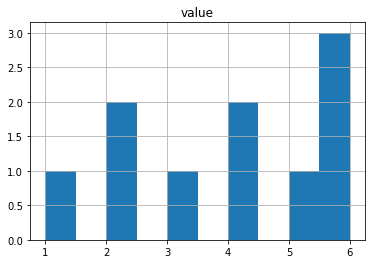

In [4]:
def frequency(d):
    return d['value'].value_counts(sort=False)
print(frequency(rolls))
rolls.hist()

In [5]:
"""
The main difference is the way to understand better the result. the graph is better than the array to understand the result at a glance
"""

'\nThe main difference is the way to understand better the result. the graph is better than the array to understand the result at a glance\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def mean(d):
    return sum(d.values/len(d))
print(mean(rolls))

[3.9]


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
freq = frequency(rolls)
print(mean(freq))

1.6666666666666667


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
def median(d):
    sort_lst = sorted(d.values)
    len_lst = len(d)
    index = (len_lst -1) // 2
    if (len_lst % 2):
        result = sort_lst[index]
    else:
        result = (sort_lst[index] + sort_lst[index + 1]) / 2
    return result[0]
print(median(rolls))

4.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
def quartile(d):
    percentiles=[25,50,75,100]
    sort_lst = sorted(d.values)
    for x in percentiles:
        a = (len(sort_lst) - 1) * x/100
        b = math.floor(a)
        c = math.ceil(a)
        if b == c:
            print((x, sort_lst[int(a)][0]))
        else:
            print((x, ((sort_lst[(b)]) + (sort_lst[(c)]))[0]/2))
quartile(rolls)

(25, 2.5)
(50, 4.0)
(75, 5.5)
(100, 6)


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [10]:
df = pd.read_csv('../data/roll_the_dice_hundred.csv')
df.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


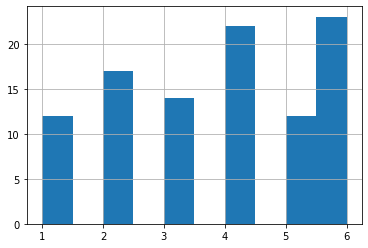

In [11]:
hundred_rolls = df.sort_values('value')[['roll','value']]
hundred_rolls['value'].hist()

In [12]:
"""
This graph shows a more variable distribution due to the number of dice rolls
"""

'\nThis graph shows a more variable distribution due to the number of dice rolls\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
hundred_mean = mean(hundred_rolls['value'])
hundred_mean

3.740000000000001

#### 3.- Now, calculate the frequency distribution.


In [14]:
hundred_freq = frequency(hundred_rolls)
hundred_freq

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

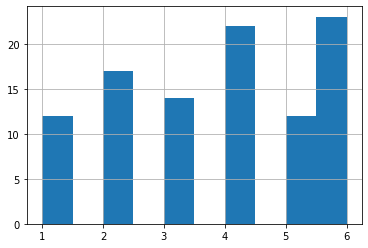

In [15]:
hundred_rolls['value'].hist()

In [21]:
"""
The shape of columns are more similar to each other. All values are repeated to a greater or lesser extent depending on the number of throws
"""

'\nThe shape of columns are more similar to each other. All values are repeated to a greater or lesser extent depending on the number of throws\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [17]:
df2 = pd.read_csv('../data/roll_the_dice_thousand.csv')
df2.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


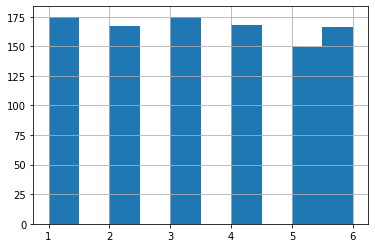

In [18]:
thousand_rolls = df2.sort_values('value')[['roll','value']]
thousand_rolls['value'].hist()

In [19]:
thousand_freq = frequency(thousand_rolls)
thousand_freq

1    175
2    167
3    175
4    168
5    149
6    166
Name: value, dtype: int64

In [22]:
"""
The distribution is more similar between values and as the throws increase the shape will be more symmetrical
"""

'\nThe distribution is more similar between values and as the throws increase the shape will be more symmetrical\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [41]:
df3 = pd.read_csv('../data/ages_population.csv')
df3.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


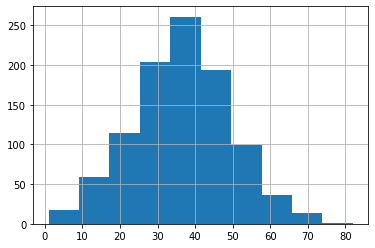

In [42]:
df3['observation'].hist()

In [28]:
ages_pop_freq = df3['observation'].value_counts(sort=True)
ages_pop_freq

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
70.0     1
71.0     1
7.0      1
69.0     1
73.0     1
Name: observation, Length: 72, dtype: int64

In [29]:
print('Taking a look to the plot, I guess that the mean should be in the range of 30 to 45 and the standard deviation should be around 10')

Taking a look to the plot, I guess that the mean should be in the range of 30 to 45 and the standard deviation should be around 10


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [36]:
ages_pop_mean = df3.mean()
ages_pop_mean

observation    36.56
dtype: float64

In [37]:
ages_pop_std = df3.std()
ages_pop_std

observation    12.8165
dtype: float64

In [38]:
"""
The chart is very helpful to guess the different statistics values. In that case, the mean is within the range and the standard deviation is close to predicted
"""

'\nThe chart is very helpful to guess the different statistics values. In that case, the mean is within the range and the standard deviation is close to predicted\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [40]:
df4 = pd.read_csv('../data/ages_population2.csv')
df4.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


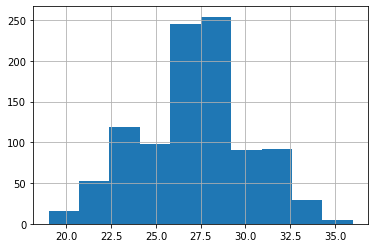

In [43]:
df4['observation'].hist()

In [44]:
ages_pop2_freq = df4['observation'].value_counts(sort=True)
ages_pop2_freq

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [45]:
"""
The range of mean are shorter than the mean of step 1. The distribution is similar than the previous plot.
"""

'\nThe range of mean are shorter than the mean of step 1. The distribution is similar than the previous plot.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [47]:
ages_pop2_mean = df4.mean()
ages_pop2_mean

observation    27.155
dtype: float64

In [48]:
ages_pop2_std = df4.std()
ages_pop2_std

observation    2.969814
dtype: float64

In [ ]:
"""
Comparing both charts, the last one returns smaller values due to the sample dataset analysed
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""